Para implementar este primer EDA a los datos vamos a juntar los datos de SIAP y del SNII para poder ya hacer un A nalisis Exploratorio de Datos o EDA por sus siglas en ingles.

Primero tenemos que instalar las librerias de regla que vamos a utilizar...

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Cambiamos el entorno de matplotlib por uno parecido a seaborn.

In [2]:
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (12,4)

C:\Users\Ivan\AppData\Local\Temp\ipykernel_23808\2294268124.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


Pasamos un arreglo con el dicretorio de frutas y verduras objetivo, determinadas por Ernesto.

In [3]:
frutas_str  = 'JITOMATE, CHILE VERDE, LIMÓN, PEPINO, PLÁTANO, MANGO, GARBANZO, BRÓCOLI, CEBOLLA, SANDÍA, PAPAYA, CALABACITA, LECHUGA, TOMATE VERDE, ESPÁRRAGO, FRAMBUESA, NOPALITOS, NUEZ, FRESA, TORONJA, ZARZAMORA, PIÑA, COLIFLOR, FRIJOL, BERENJENA, UVA DE MESA, GUAYABA, NARANJA, PAPA, MELÓN, MANZANA, PERA, DURAZNO'
frutas = frutas_str.lower().split(", ")

### Vamos a centrarnos primero en un solo estado!!

In [4]:
data_snim = pd.read_parquet(r"..\..\data\clean_data\precios_sniim.parquet")

In [5]:
data_snim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019574 entries, 0 to 2019573
Data columns (total 9 columns):
 #   Column        Dtype         
---  ------        -----         
 0   fecha         datetime64[ns]
 1   producto      object        
 2   presentacion  object        
 3   origen        object        
 4   destino       object        
 5   central       object        
 6   precio_min    float64       
 7   precio_max    float64       
 8   precio_frec   float64       
dtypes: datetime64[ns](1), float64(3), object(5)
memory usage: 138.7+ MB


In [6]:
data_snim.describe()

,fecha,precio_min,precio_max,precio_frec
count,2019574,2.019574e+06,2.019574e+06,2.019574e+06
mean,2021-12-27 09:42:16.834797056,3.146585e+01,3.454450e+01,3.303388e+01
min,2020-01-02 00:00:00,1.000000e-01,2.000000e-01,0.000000e+00
25%,2021-02-24 00:00:00,1.200000e+01,1.400000e+01,1.300000e+01
50%,2022-01-12 00:00:00,1.900000e+01,2.150000e+01,2.000000e+01
75%,2022-11-24 00:00:00,3.600000e+01,4.000000e+01,3.800000e+01
max,2023-10-06 00:00:00,1.222220e+03,3.030000e+03,6.000000e+02
std,NaN,3.320627e+01,3.532131e+01,3.411176e+01


In [7]:
data_snim.head(3)

,fecha,producto,presentacion,origen,destino,central,precio_min,precio_max,precio_frec
0,2020-01-02,Acelga,Manojo,Puebla,Baja California,"Central de Abasto INDIA, Tijuana",5.0,5.0,5.0
1,2020-01-03,Acelga,Manojo,Puebla,Baja California,"Central de Abasto INDIA, Tijuana",5.0,5.0,5.0
2,2020-01-06,Acelga,Manojo,Puebla,Baja California,"Central de Abasto INDIA, Tijuana",5.0,5.0,5.0


In [8]:
data_snim_son = data_snim[data_snim["destino"] == "Sonora"]
data_snim_son.head(3)

,fecha,producto,presentacion,origen,destino,central,precio_min,precio_max,precio_frec
2883,2020-01-02,Acelga,Manojo,Puebla,Sonora,Central de Abasto de Cd. Obregón,6.0,6.0,6.0
2884,2020-01-03,Acelga,Manojo,Puebla,Sonora,Central de Abasto de Cd. Obregón,6.0,6.0,6.0
2885,2020-01-06,Acelga,Manojo,Puebla,Sonora,Central de Abasto de Cd. Obregón,6.0,6.0,6.0


In [9]:
data_snim_son["producto"].unique()

array(['Acelga', 'Aguacate Hass', 'Ajo Blanco', 'Ajo Morado', 'Apio',
       'Betabel', 'Brocoli', 'Cacahuate', 'Calabacita Italiana', 'Camote',
       'Cebolla Bola', 'Cebolla De Rabo', 'Cebolla Morada', 'Chayote',
       'Chayote Sin Espinas', 'Chile Anaheim', 'Chile Ancho',
       'Chile California', 'Chile Caribe', 'Chile Chilaca',
       'Chile De Arbol Fresco', 'Chile De Arbol Seco', 'Chile Guajillo',
       'Chile Habanero', 'Chile Jalapeño', 'Chile Pasilla',
       'Chile Pimiento Morron', 'Chile Poblano', 'Chile Serrano',
       'Cilantro', 'Ciruela Pasa', 'Ciruela Roja', 'Coco',
       'Coliflor Mediana', 'Coliflor Sin Clasificacion', 'Col Mediana',
       'Durazno Amarillo', 'Ejote', 'Ejote Largo', 'Elote', 'Espinaca',
       'Fresa', 'Guanabana', 'Guayaba', 'Jamaica', 'Jicama', 'Kiwi',
       'Lechuga Romanita Grande', 'Lechuga Romanita Mediana',
       'Lechuga Romanita Sin Clasificacion', 'Limon Con Semilla #2',
       'Limon Con Semilla #3', 'Limon Con Semilla #5', 'Mand

Para poder analizar el entorno de los precios de cada verdura primero nos cenrtamos en una sola, tener una mejor comprención. En nuesto caso nos centramos ocn el Tomate Bola.

In [10]:
data_snim_son_tmteBola = data_snim_son[data_snim_son["producto"] == 'Tomate Bola']

vemos que cada hay una claisificiacion adicional llamada presentación, cual es el dato de la presentacion por la que se vende los tomates bola, en este caso hay paquetes cajas de 14 kg, 15kg, 13, 9, y 25 kg.

In [11]:
data_snim_son_tmteBola["presentacion"].unique()

array(['Caja de 14 kg.', 'Caja de 15 kg.', 'Caja de 12 kg.',
       'Caja de 13 kg.', 'Caja de 9 kg.', 'Caja de 10 kg.',
       'Caja de 25 kg.'], dtype=object)

In [12]:
data_snim_son_tmteBola.head(3)

,fecha,producto,presentacion,origen,destino,central,precio_min,precio_max,precio_frec
1777313,2020-01-02,Tomate Bola,Caja de 14 kg.,Sinaloa,Sonora,Central de Abasto de Cd. Obregón,17.14,20.71,20.0
1777314,2020-01-03,Tomate Bola,Caja de 14 kg.,Sinaloa,Sonora,Central de Abasto de Cd. Obregón,17.14,20.71,20.0
1777315,2020-01-06,Tomate Bola,Caja de 14 kg.,Sinaloa,Sonora,Central de Abasto de Cd. Obregón,17.14,20.71,20.0


imprimimos la frecuencia de registro de cada uno de las presentaciones por separado, y a su vez la separamos del central municipal a donde llegan los productos.

In [13]:
data_snim_son_tmteBola.groupby(["central", "presentacion"]).count()[["precio_frec"]]

precio_frec
central                                            presentacion               
Central de Abasto de Cd. Obregón                   Caja de 10 kg.           43
                                                   Caja de 12 kg.          143
                                                   Caja de 13 kg.          117
                                                   Caja de 14 kg.          236
                                                   Caja de 15 kg.           75
                                                   Caja de 25 kg.           13
                                                   Caja de 9 kg.            68
Mercado de Abasto "Francisco I. Madero" de Herm... Caja de 13 kg.          911

<Axes: ylabel='central,presentacion'>

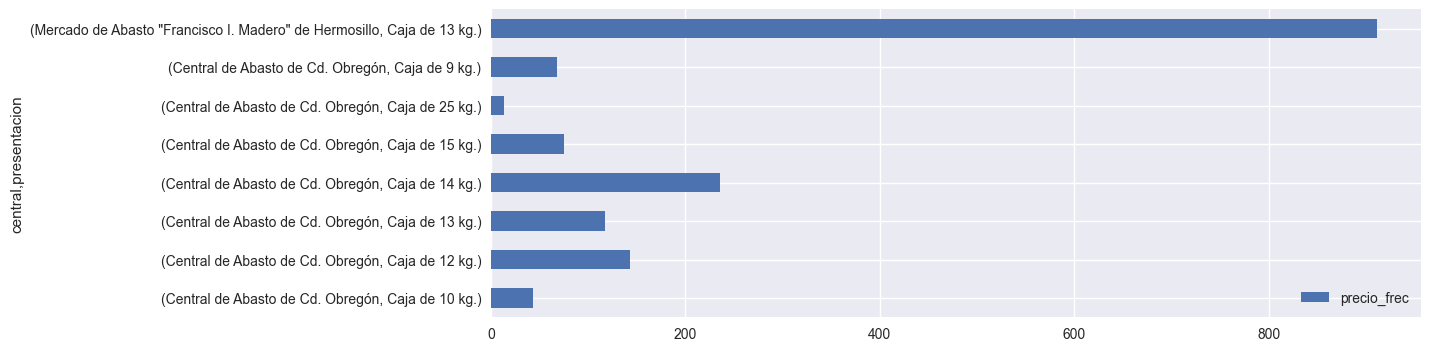

In [14]:
import seaborn as sns
cont_tomate_pres = data_snim_son_tmteBola.groupby(["central", "presentacion"]).count()[["precio_frec"]]
# cont_tomate_pres_sort = cont_tomate_pres.sort_values(ascending=True)
cont_tomate_pres.plot(kind="barh")

vemos que el mayor registrp es de la caja de 13kg.

In [15]:
centro_son = data_snim_son_tmteBola["central"].unique()
centro_son

array(['Central de Abasto de Cd. Obregón',
       'Mercado de Abasto "Francisco I. Madero" de Hermosillo'],
      dtype=object)

En este caso Sonora cuenta con dos centros de abastos. Central de Abasto de cd Obregon y Mercado de abasto de Hermosillo.

mediante un pivot_table separamos las variables en precio_frec por presentacion.

In [16]:
data_sample = data_snim_son_tmteBola.pivot_table(index = ["central","fecha"], columns="presentacion", values="precio_frec")
data_sample.head()

presentacion                                 Caja de 10 kg.  Caja de 12 kg.  \
central                          fecha                                        
Central de Abasto de Cd. Obregón 2020-01-02             NaN             NaN   
                                 2020-01-03             NaN             NaN   
                                 2020-01-06             NaN             NaN   
                                 2020-01-07             NaN             NaN   
                                 2020-01-08             NaN             NaN   

presentacion                                 Caja de 13 kg.  Caja de 14 kg.  \
central                          fecha                                        
Central de Abasto de Cd. Obregón 2020-01-02             NaN           20.00   
                                 2020-01-03             NaN           20.00   
                                 2020-01-06             NaN           20.00   
                                 2020-01-07             NaN           20.71   
                                 2020-01-08             NaN           20.71   

presentacion                                 Caja de 15 kg.  Caja de 25 kg.  \
central                          fecha                                        
Central de Abasto de Cd. Obregón 2020-01-02             NaN             NaN   
                                 2020-01-03             NaN             NaN   
                                 2020-01-06             NaN             NaN   
                                 2020-01-07             NaN             NaN   
                                 2020-01-08             NaN             NaN   

presentacion                                 Caja de 9 kg.  
central                          fecha                      
Central de Abasto de Cd. Obregón 2020-01-02            NaN  
                                 2020-01-03            NaN  
                                 2020-01-06            NaN  
                                 2020-01-07            NaN  
                                 2020-01-08            NaN

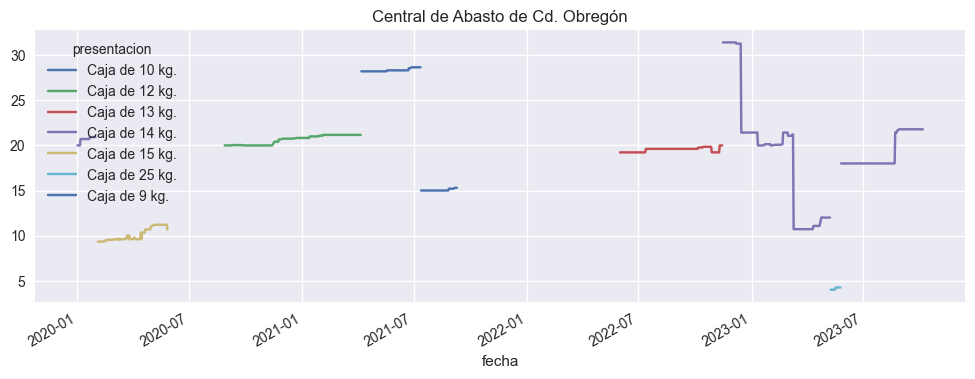

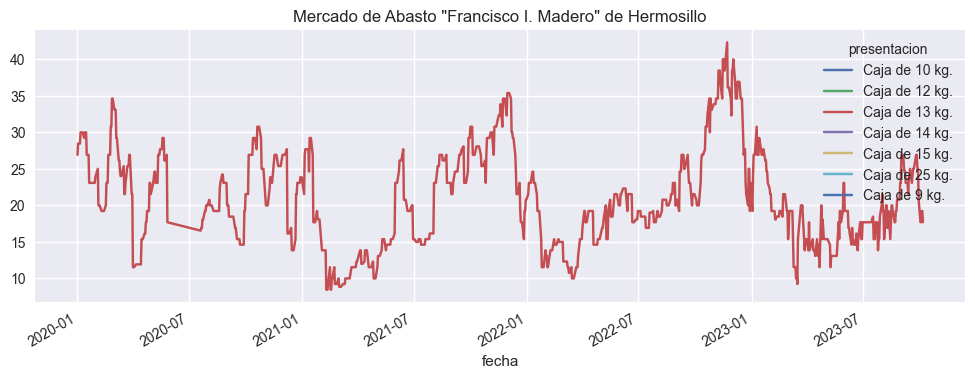

In [17]:
for centro in centro_son:
    data_sample.loc[centro].plot(kind="line", title=centro)

Vemos que los datos de Hermosillo son muchisimo mas consistentes que los e Ciudad Obregon, en este caso son los datos que se van a tomar como referencia.

Una vez teniendo la tendencia de precios del Tomate Bola lo siguiente a hacer es sacar la informacion de siembra de Tomate en Sonora. 

In [18]:
data_siap = pd.read_parquet(r"..\..\data\clean_data\siap.parquet.zip")

In [19]:
data_siap.head()

,Entidad,Municipio,Cultivo,fecha,variable,values
0,Aguascalientes,Aguascalientes,Agave,2020-04-01,Sembrada,8.0
1,Baja California,Ensenada,Agave,2020-04-01,Sembrada,1.0
2,Colima,Manzanillo,Agave,2020-04-01,Sembrada,1.4
3,Durango,Durango,Agave,2020-04-01,Sembrada,12.0
4,Durango,Mezquital,Agave,2020-04-01,Sembrada,110.0


In [20]:
data_siap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3277140 entries, 0 to 3277139
Data columns (total 6 columns):
 #   Column     Dtype         
---  ------     -----         
 0   Entidad    category      
 1   Municipio  category      
 2   Cultivo    category      
 3   fecha      datetime64[ns]
 4   variable   object        
 5   values     float64       
dtypes: category(3), datetime64[ns](1), float64(1), object(1)
memory usage: 87.6+ MB


In [21]:
data_siap.describe()

,fecha,values
count,3277140,3.277140e+06
mean,2021-10-30 21:58:39.852065536,2.769177e+03
min,2020-01-01 00:00:00,0.000000e+00
25%,2020-12-01 00:00:00,0.000000e+00
50%,2021-11-01 00:00:00,2.100000e+00
75%,2022-09-01 00:00:00,5.000000e+01
max,2023-08-01 00:00:00,5.503910e+07
std,NaN,1.712275e+05


In [22]:
data_siap_son = data_siap[data_siap["Entidad"] == "Sonora"]

In [23]:
data_siap_son

,Entidad,Municipio,Cultivo,fecha,variable,values
336,Sonora,Hermosillo,Agave,2020-04-01,Sembrada,4.00
337,Sonora,Rayón,Agave,2020-04-01,Sembrada,12.00
338,Sonora,San Pedro de La Cueva,Agave,2020-04-01,Sembrada,13.00
339,Sonora,Suaqui Grande,Agave,2020-04-01,Sembrada,24.00
340,Sonora,Ures,Agave,2020-04-01,Sembrada,11.00
...,...,...,...,...,...,...
3274184,Sonora,San Luis Río Colorado,Zanahoria,2021-09-01,Rendimiento (udm/ha),32.50
3274317,Sonora,Bácum,Zanahoria,2022-09-01,Rendimiento (udm/ha),26.51
3274318,Sonora,Cajeme,Zanahoria,2022-09-01,Rendimiento (udm/ha),25.50
3274319,Sonora,Hermosillo,Zanahoria,2022-09-01,Rendimiento (udm/ha),22.00


In [29]:
print(data_siap_son["Cultivo"].unique())

['agave' 'aguacate' 'ajonjolí' 'ajo' 'alfalfa' 'algodón hueso'
 'avena forrajera en verde' 'berenjena' 'brócoli' 'calabacita'
 'cebada grano' 'cebolla' 'chile verde' 'coliflor' 'cártamo' 'durazno'
 'elote' 'espárrago' 'frijol' 'garbanzo grano' 'lechuga' 'limón' 'mango'
 'manzana' 'maíz forrajero en verde' 'maíz grano' 'melón' 'naranja'
 'nopalitos' 'nuez' 'papa' 'pepino' 'pera' 'sandía'
 'sorgo forrajero en verde' 'sorgo grano' 'soya' 'tomate rojo (jitomate)'
 'tomate verde' 'toronja (pomelo)' 'trigo grano' 'uva' 'zanahoria']


Son bastantes verduras las que se siembran en Sonora, vamos a escoger aquellas verduras determinadas por Ernesto. Ponemos en minusculas todoas los tipos de cultivo.

In [25]:
data_siap_son.loc[:,"Cultivo"] = data_siap_son.loc[:,"Cultivo"].str.lower()

Siguiendo con el mismo ejecricio de el snimm vamos a sacar la siembra de tomate (jitomate)

In [34]:
data_siap_tomte = data_siap_son[data_siap_son["Cultivo"] == "tomate rojo (jitomate)"]
data_siap_tomte.head()

,Entidad,Municipio,Cultivo,fecha,variable,values
582170,Sonora,Bácum,tomate rojo (jitomate),2020-04-01,Sembrada,76.0
582171,Sonora,Cajeme,tomate rojo (jitomate),2020-04-01,Sembrada,481.0
582172,Sonora,Empalme,tomate rojo (jitomate),2020-04-01,Sembrada,145.0
582173,Sonora,Guaymas,tomate rojo (jitomate),2020-04-01,Sembrada,220.0
582174,Sonora,Hermosillo,tomate rojo (jitomate),2020-04-01,Sembrada,146.0


In [36]:
municipios_tomateros = data_siap_tomte["Municipio"].unique()

In [41]:
data_sample = data_siap_tomte.pivot_table(index = ["Municipio","fecha"], columns="variable", values="values")
data_sample.head()

variable                  Cosechada  Producción  Rendimiento (udm/ha)  \
Municipio     fecha                                                     
Benito Juárez 2020-01-01        0.0         0.0                  0.00   
              2020-02-01        7.0       210.0                 30.00   
              2020-03-01      132.0      7870.0                 59.62   
              2020-04-01      200.0     16293.5                 81.47   
              2020-05-01      225.0     16878.5                 75.02   

variable                  Sembrada  Siniestrada  
Municipio     fecha                              
Benito Juárez 2020-01-01     150.0          0.0  
              2020-02-01     200.0          0.0  
              2020-03-01     200.0          0.0  
              2020-04-01     237.0          0.0  
              2020-05-01     237.0          0.0

In [42]:
data_sample = data_sample.drop(columns=["Producción", "Rendimiento (udm/ha)"])

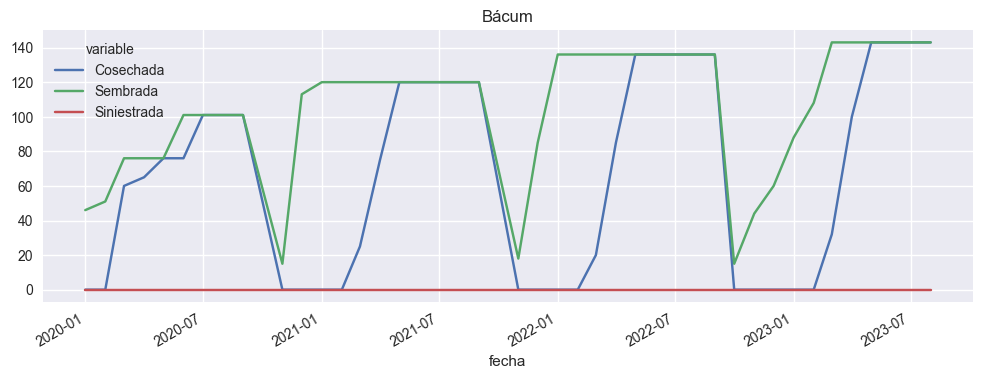

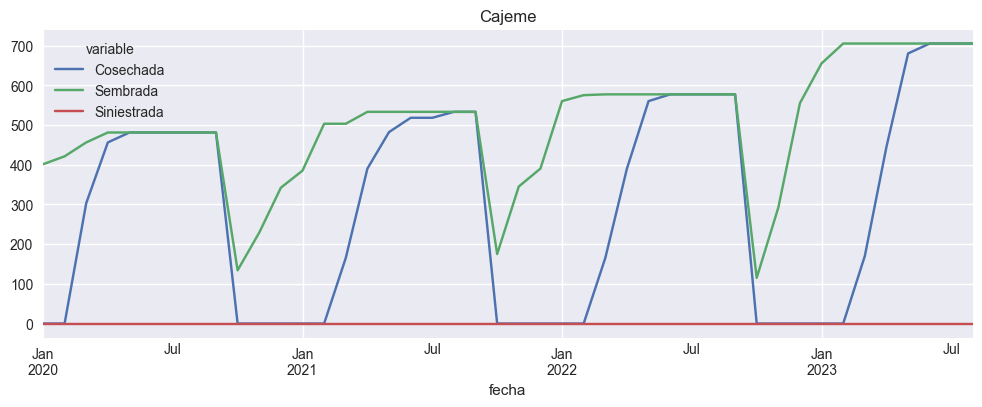

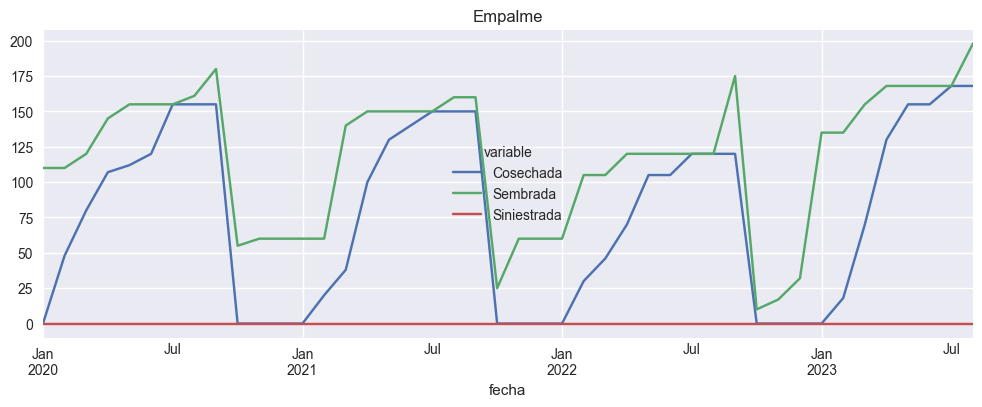

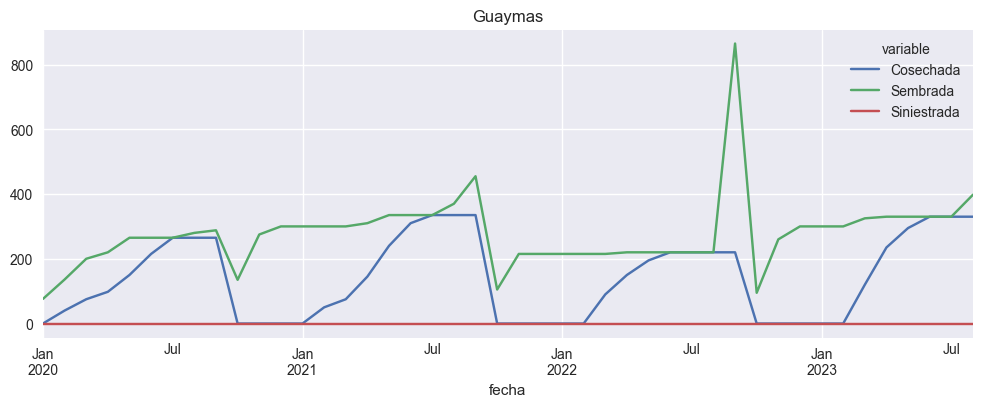

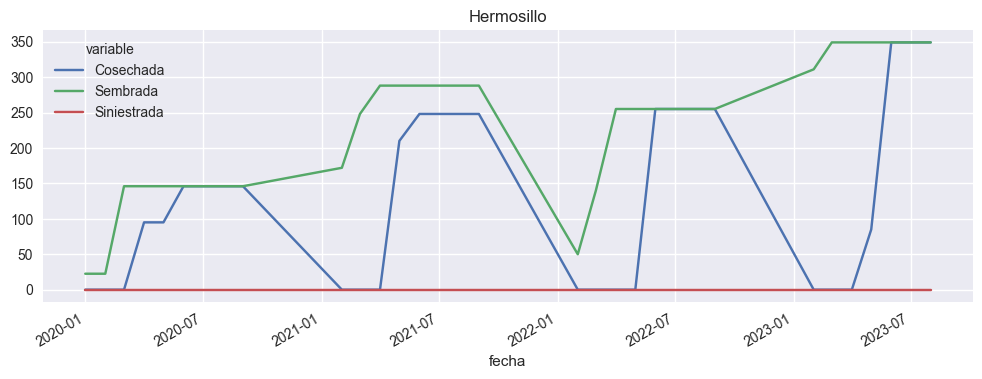

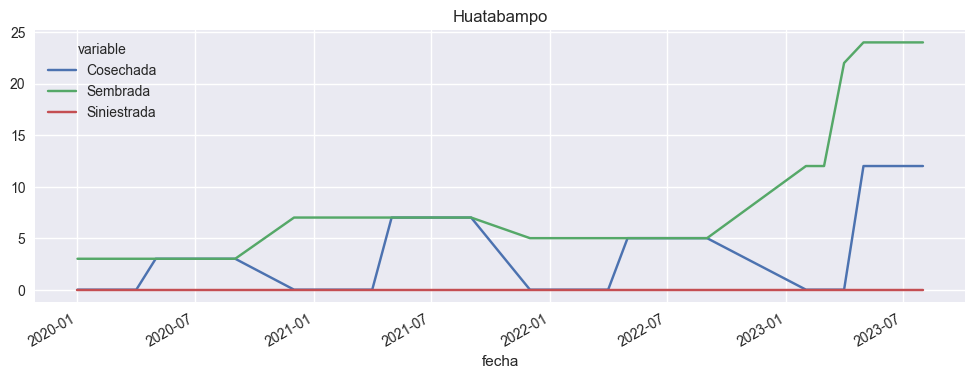

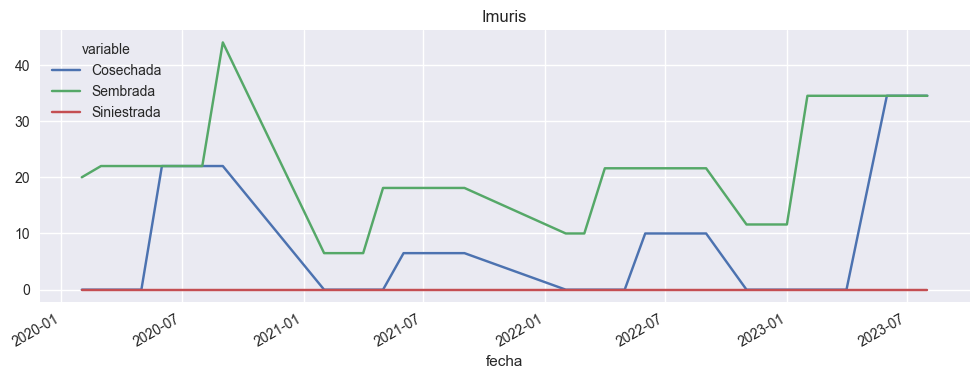

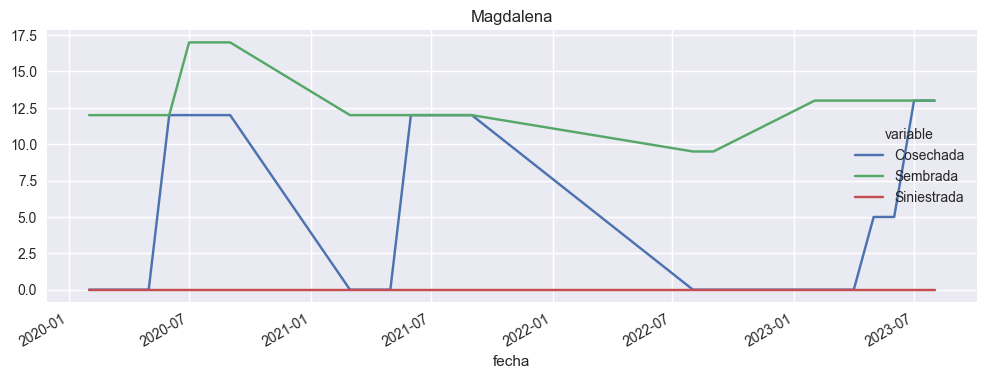

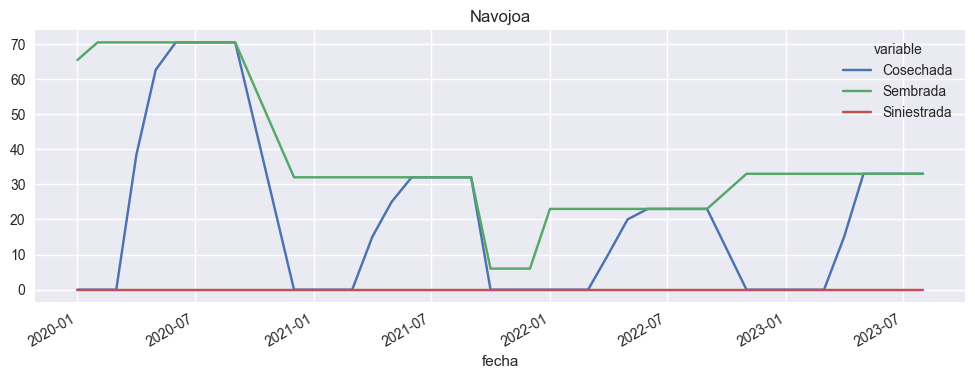

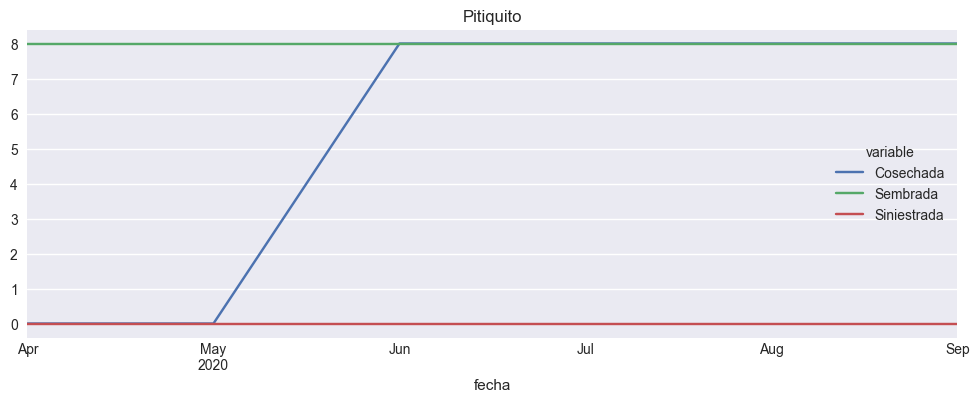

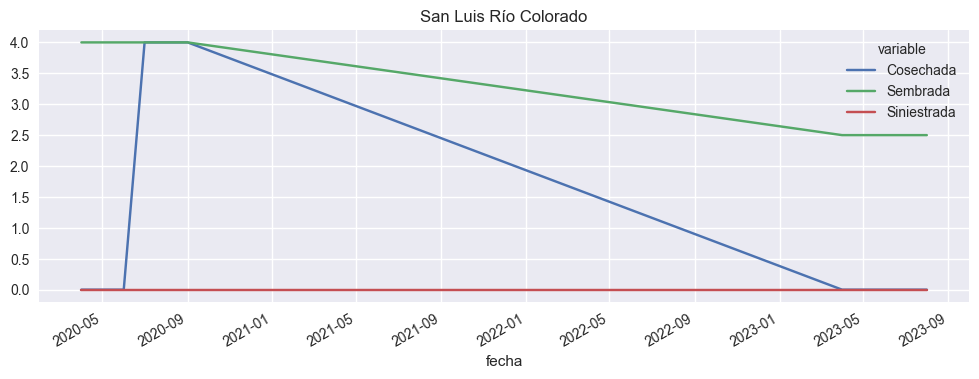

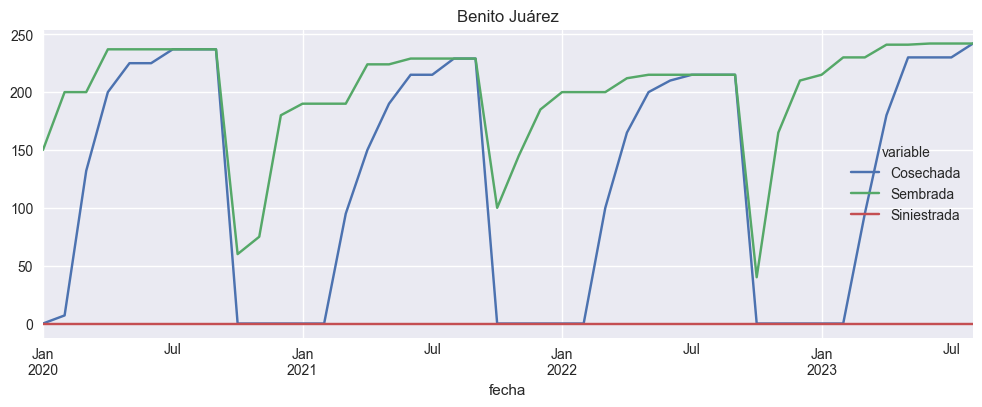

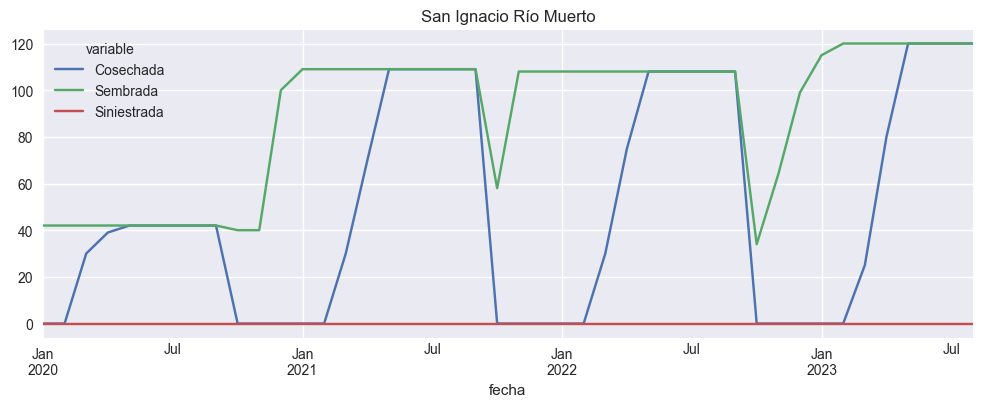

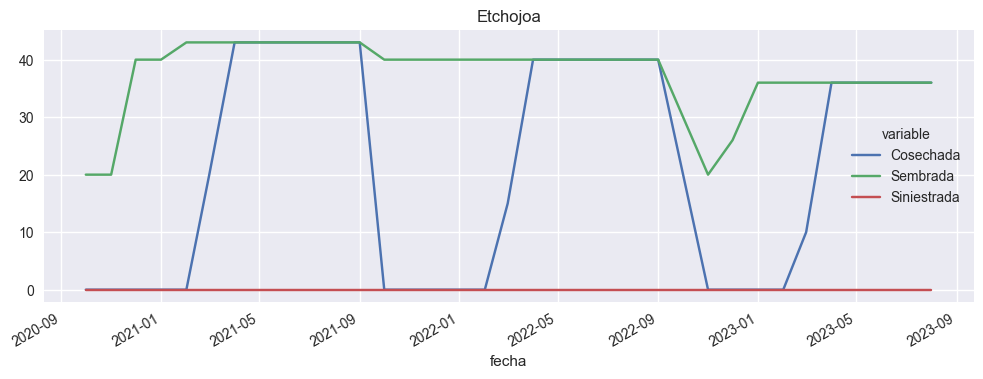

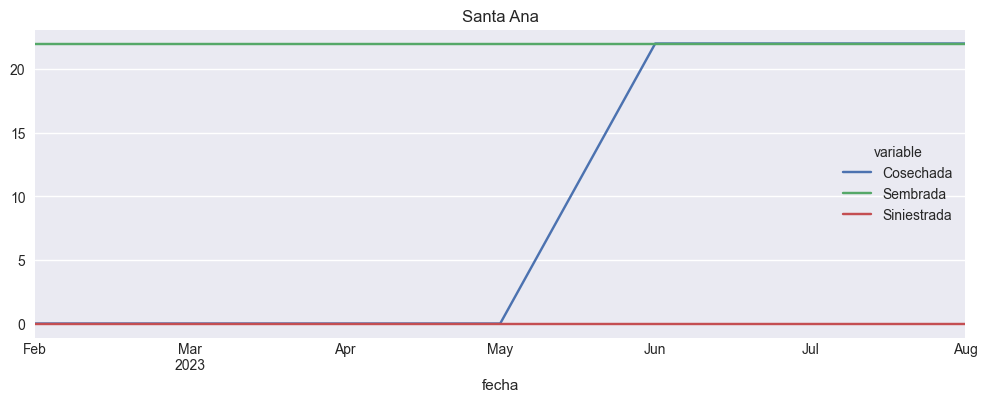

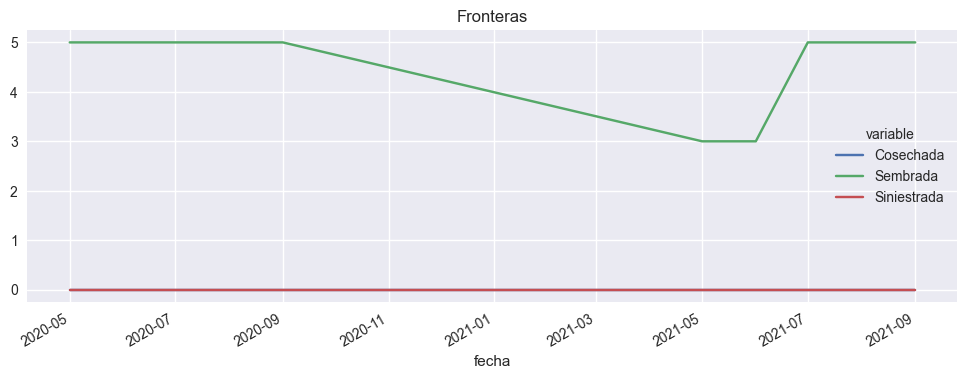

In [43]:
for centro in municipios_tomateros:
    data_sample.loc[centro].plot(kind="line", title=centro)